In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [2]:
train = pd.read_csv("./ginko/train(1).csv")
test = pd.read_csv("./ginko/test(1).csv")

In [3]:
train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1


In [4]:
trainX = train.iloc[:, 0:17]

In [5]:
trainX.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success


In [6]:
y = train["y"]

In [7]:
test.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,30,management,single,tertiary,no,1028,no,no,cellular,4,feb,1294,2,-1,0,unknown
1,2,39,self-employed,single,tertiary,no,426,no,no,unknown,18,jun,1029,1,-1,0,unknown
2,3,38,technician,single,tertiary,no,-572,yes,yes,unknown,5,jun,26,24,-1,0,unknown
3,4,34,technician,single,secondary,no,-476,yes,no,unknown,27,may,92,4,-1,0,unknown
4,5,37,entrepreneur,married,primary,no,62,no,no,cellular,31,jul,404,2,-1,0,unknown


In [8]:
testX = test.copy()

In [9]:
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)

In [11]:
clf1 = DT(max_depth=2, min_samples_leaf=500)

In [12]:
clf1.fit(trainX, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=500, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
export_graphviz(clf1,out_file="tree.dot", feature_names=trainX.columns, class_names=["0","1"],
               filled=True, rounded= True)

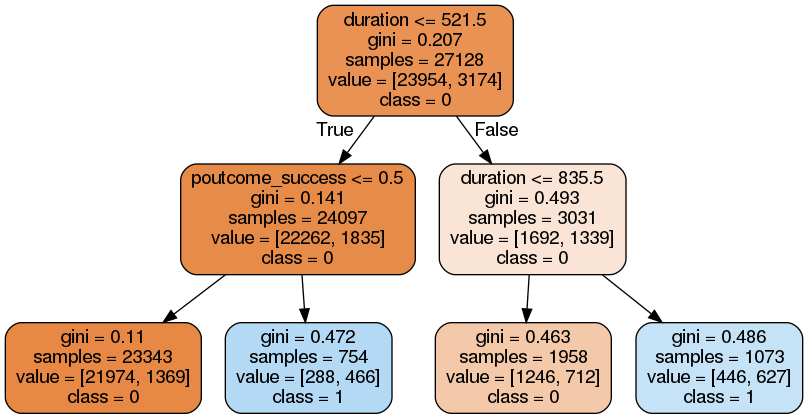

In [18]:
g = pydotplus.graph_from_dot_file(path="tree.dot")
Image(g.create_png())

In [19]:
pred = clf1.predict_proba(testX)

In [20]:
pred

array([[0.41565704, 0.58434296],
       [0.41565704, 0.58434296],
       [0.94135287, 0.05864713],
       ...,
       [0.94135287, 0.05864713],
       [0.94135287, 0.05864713],
       [0.94135287, 0.05864713]])

In [21]:
pred = pred[:,1]

In [22]:

pred

array([0.58434296, 0.58434296, 0.05864713, ..., 0.05864713, 0.05864713,
       0.05864713])

In [23]:
clf2 = DT(max_depth=4, min_samples_leaf=500)

In [24]:
clf2.fit(trainX, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=500, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
export_graphviz(clf2,out_file="tree2.dot", feature_names=trainX.columns, class_names=["0","1"],
               filled=True, rounded= True)

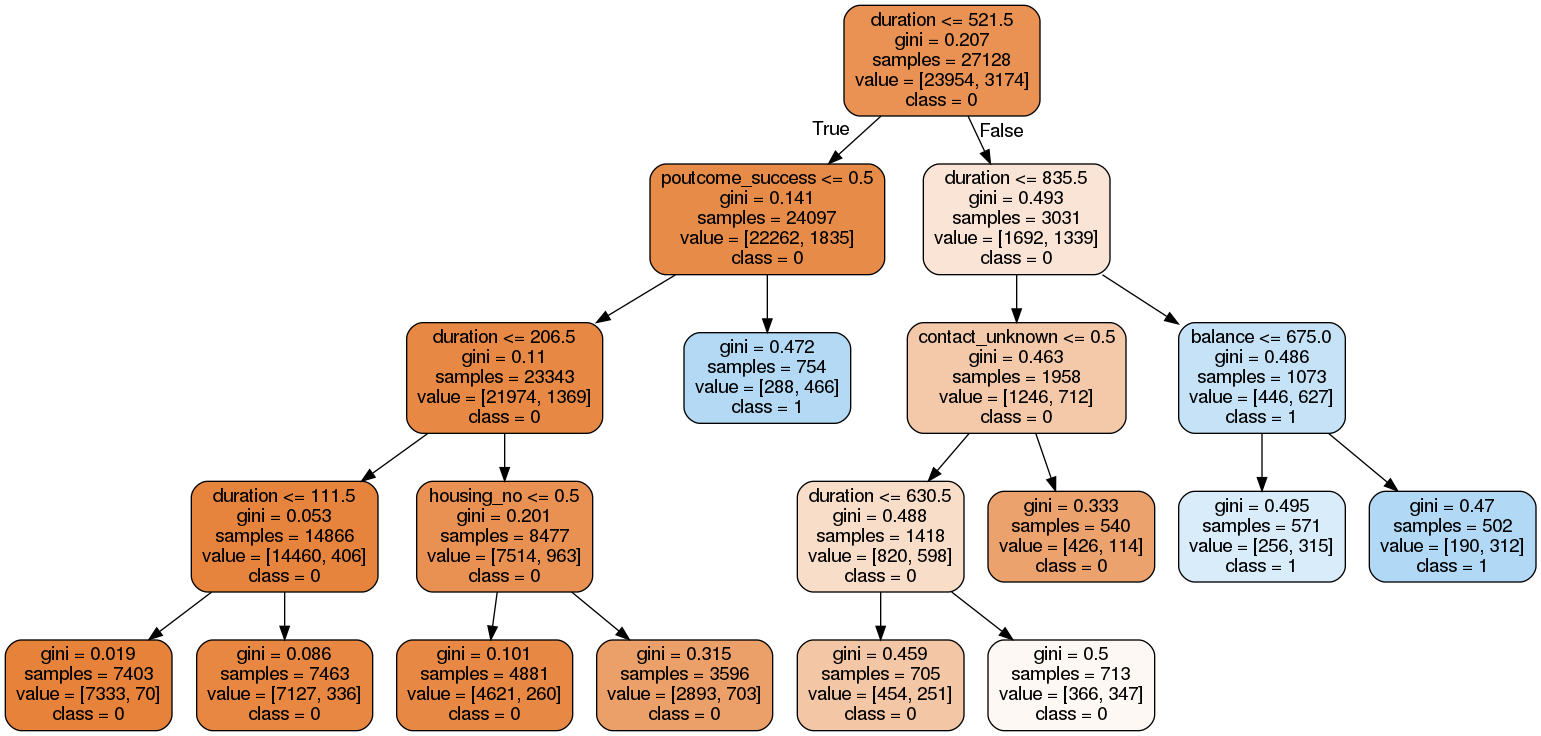

In [26]:
g = pydotplus.graph_from_dot_file(path="tree2.dot")
Image(g.create_png())

In [27]:
pred = clf2.predict_proba(testX)

In [28]:
pred

array([[0.37848606, 0.62151394],
       [0.44833625, 0.55166375],
       [0.99054437, 0.00945563],
       ...,
       [0.99054437, 0.00945563],
       [0.95497789, 0.04502211],
       [0.99054437, 0.00945563]])

In [29]:
pred = pred[:,1]